https://www.kaggle.com/code/ajaymanwani/loan-approval-prediction
https://github.com/codebasics/py/blob/master/ML/7_logistic_reg/Exercise/7_logistic_regression_exercise.ipynb

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/loan_approval.csv')

In [5]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df.drop('Loan_ID',axis=1,inplace=True)

##Data exploration and visualization

In [7]:
approved = df[df.Loan_Status=='Y']
approved.shape

(422, 12)

In [8]:
rejected = df[df.Loan_Status=='N']
rejected.shape

(192, 12)

###Average numbers for all columns

In [9]:
df.groupby('Loan_Status').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,151.220994,344.064516,0.541899
Y,5384.068720,1504.516398,144.294404,341.072464,0.981818


From above table it seems only Credit_History has impact on Loan_Status



###Impact of Gender on Loan Status

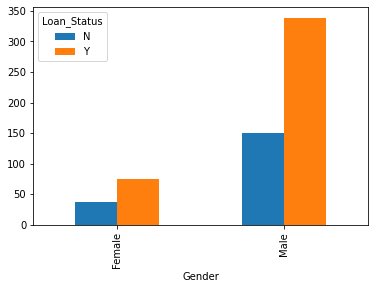

In [10]:
pd.crosstab(df.Gender,df.Loan_Status).plot(kind='bar')

Above bar chart shows Male people have more chances of Loan approval

###Impact of Marriage on Loan Status

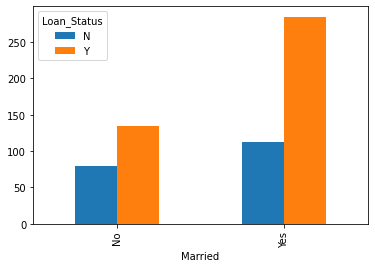

In [11]:
pd.crosstab(df.Married,df.Loan_Status).plot(kind='bar')

It seems married person has more chance of loan approval

###Impact of Dependents on Loan Status

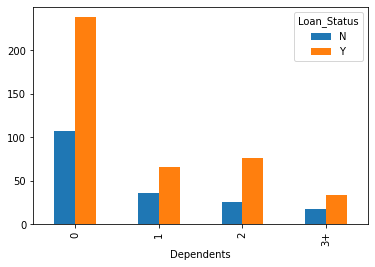

In [12]:
pd.crosstab(df.Dependents,df.Loan_Status).plot(kind='bar')

There is not much impact of dependent in loan status

###Impact of Education on Loan Status

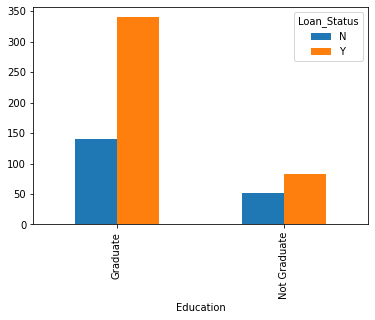

In [13]:
pd.crosstab(df.Education,df.Loan_Status).plot(kind='bar')

Clearly education has impact on loan status

###Impact of Self_Employed on Loan Status

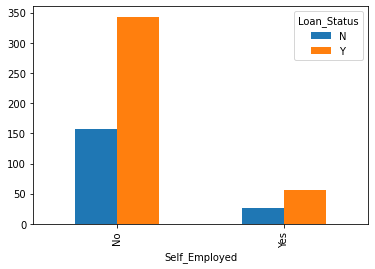

In [14]:
pd.crosstab(df.Self_Employed,df.Loan_Status).plot(kind='bar')

It seems there is some impact of employment on loan status

###Impact of Credit_History on Loan Status

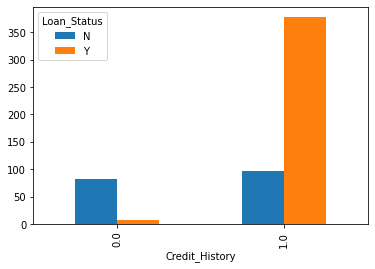

In [15]:
pd.crosstab(df.Credit_History,df.Loan_Status).plot(kind='bar')

Clearly credit history has huge impact on loan status

###Impact of Property_Area on Loan Status

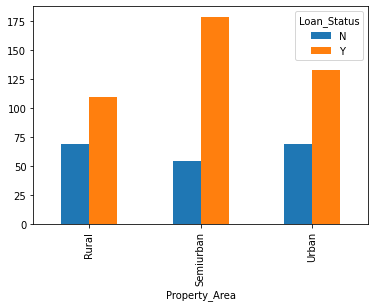

In [16]:
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind='bar')

Not much impact of property area on loan status

After observing all bar charts we can take following columns as our variables


1.   Gender 
2.   Married 
3.   Education
4.   Self_Employed 
5.   Credit_History



##One Hot Encoding

In [17]:
df_final = df[['Gender','Married','Education','Self_Employed','Credit_History','Loan_Status']]
df_final.head(2)

,Gender,Married,Education,Self_Employed,Credit_History,Loan_Status
0,Male,No,Graduate,No,1.0,Y
1,Male,Yes,Graduate,No,1.0,N


In [18]:
df_final.isna().sum()

Gender            13
Married            3
Education          0
Self_Employed     32
Credit_History    50
Loan_Status        0
dtype: int64

In [19]:
#### Encoding categrical Features: ##########
train_df_encoded = pd.get_dummies(df_final,drop_first=True)
train_df_encoded.head()

,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Loan_Status_Y
0,1.0,1,0,0,0,1
1,1.0,1,1,0,0,0
2,1.0,1,1,0,1,1
3,1.0,1,1,1,0,1
4,1.0,1,0,0,0,1


In [20]:
train_df_encoded.isna().sum()

Credit_History            50
Gender_Male                0
Married_Yes                0
Education_Not Graduate     0
Self_Employed_Yes          0
Loan_Status_Y              0
dtype: int64

In [21]:
########## Split Features and Target Varible ############
X = train_df_encoded.drop(columns='Loan_Status_Y')
y = train_df_encoded['Loan_Status_Y']

In [22]:
################# Splitting into Train -Test Data #######
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)

In [23]:
############### Handling/Imputing Missing values #############
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

##Model 1: Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [25]:
model.fit(X_train, y_train)

LogisticRegression()

In [26]:
model.score(X_test_imp,y_test)

0.8536585365853658

In [27]:
import joblib
# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(model, filename)

['finalized_model.sav']

In [28]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test_imp,y_test)
print(result)

0.8536585365853658


Gender	Married	Education	Self_Employed	Credit_History	Loan_Status <br>
0	Male	No	Graduate	No	1.0	Y

In [29]:
def loan_pred(Gender, Married, Education, Self_Employed, Credit_History):
  g = 1 if Gender == 'Male' else 0
  m = 1 if Married == 'Yes' else 0
  e = 1 if Education == 'Not Graduate' else 0
  s = 1 if Self_Employed == 'Yes' else 0

  model = joblib.load(filename)
  Loan_Status = model.predict([[g,m,e,s,Credit_History]])

  return Loan_Status[0]

In [30]:
loan_pred("Male", "No", "Graduate", "No", 1.0)

1

In [31]:
a = float('"1.0"'.replace('"',"")) 
a

1.0

In [32]:
import sklearn
print(sklearn.__version__)

1.0.2


In [33]:
Gender = 'Male'
g = 1 if Gender == 'Male' else 0
g

1

In [34]:
Gender = '"Male"'
g = 1 if Gender == 'Male' else 0
g

0

In [35]:
import numpy
print(numpy.__version__)

1.21.6


In [36]:
import scipy
print(scipy.__version__)

1.7.3


In [37]:
import joblib
print(joblib.__version__)

1.2.0


In [38]:
import threadpoolctl
print(threadpoolctl.__version__)

3.1.0


In [39]:
import Cython
print(Cython.__version__)

0.29.32


In [40]:
!python --version

Python 3.7.15


In [41]:
!setuptools -v

/bin/bash: setuptools: command not found


In [43]:
# pip3 install numpy==1.14.6
# pip3 install scipy==1.1.0
# pip3 install joblib==1.2.0
# pip3 install threadpoolctl==2.0.0
# pip3 install Cython==0.29.24